### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
stop = stopwords.words('english')

### Importing the Data

In [2]:
hotel_data = pd.read_csv(r'C:\Users\SHREE\Downloads\Final Exams\hotel-reviews.csv')
hotel_data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### Simple Pre-Processing on 'reviews.text'

Tokenization, Stop words removal - 

- Tokenization

In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.Here we are performing the word tokenization from NLTK Library

- Stopwords

Stop words are words which are filtered out before or after processing of natural language data (text).[1] Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list

In [3]:
def tokenizeandstopwords(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

In [4]:
hotel_data['Review'] = hotel_data['Review'].apply(tokenizeandstopwords)

### WordCloud

A tag cloud (word cloud or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color.[2] This format is useful for quickly perceiving the most prominent terms to determine its relative prominence. When used as website navigation aids, the terms are hyperlinked to items associated with the tag

In [5]:
# Defining the word Cloud function to generate the word cloud

def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

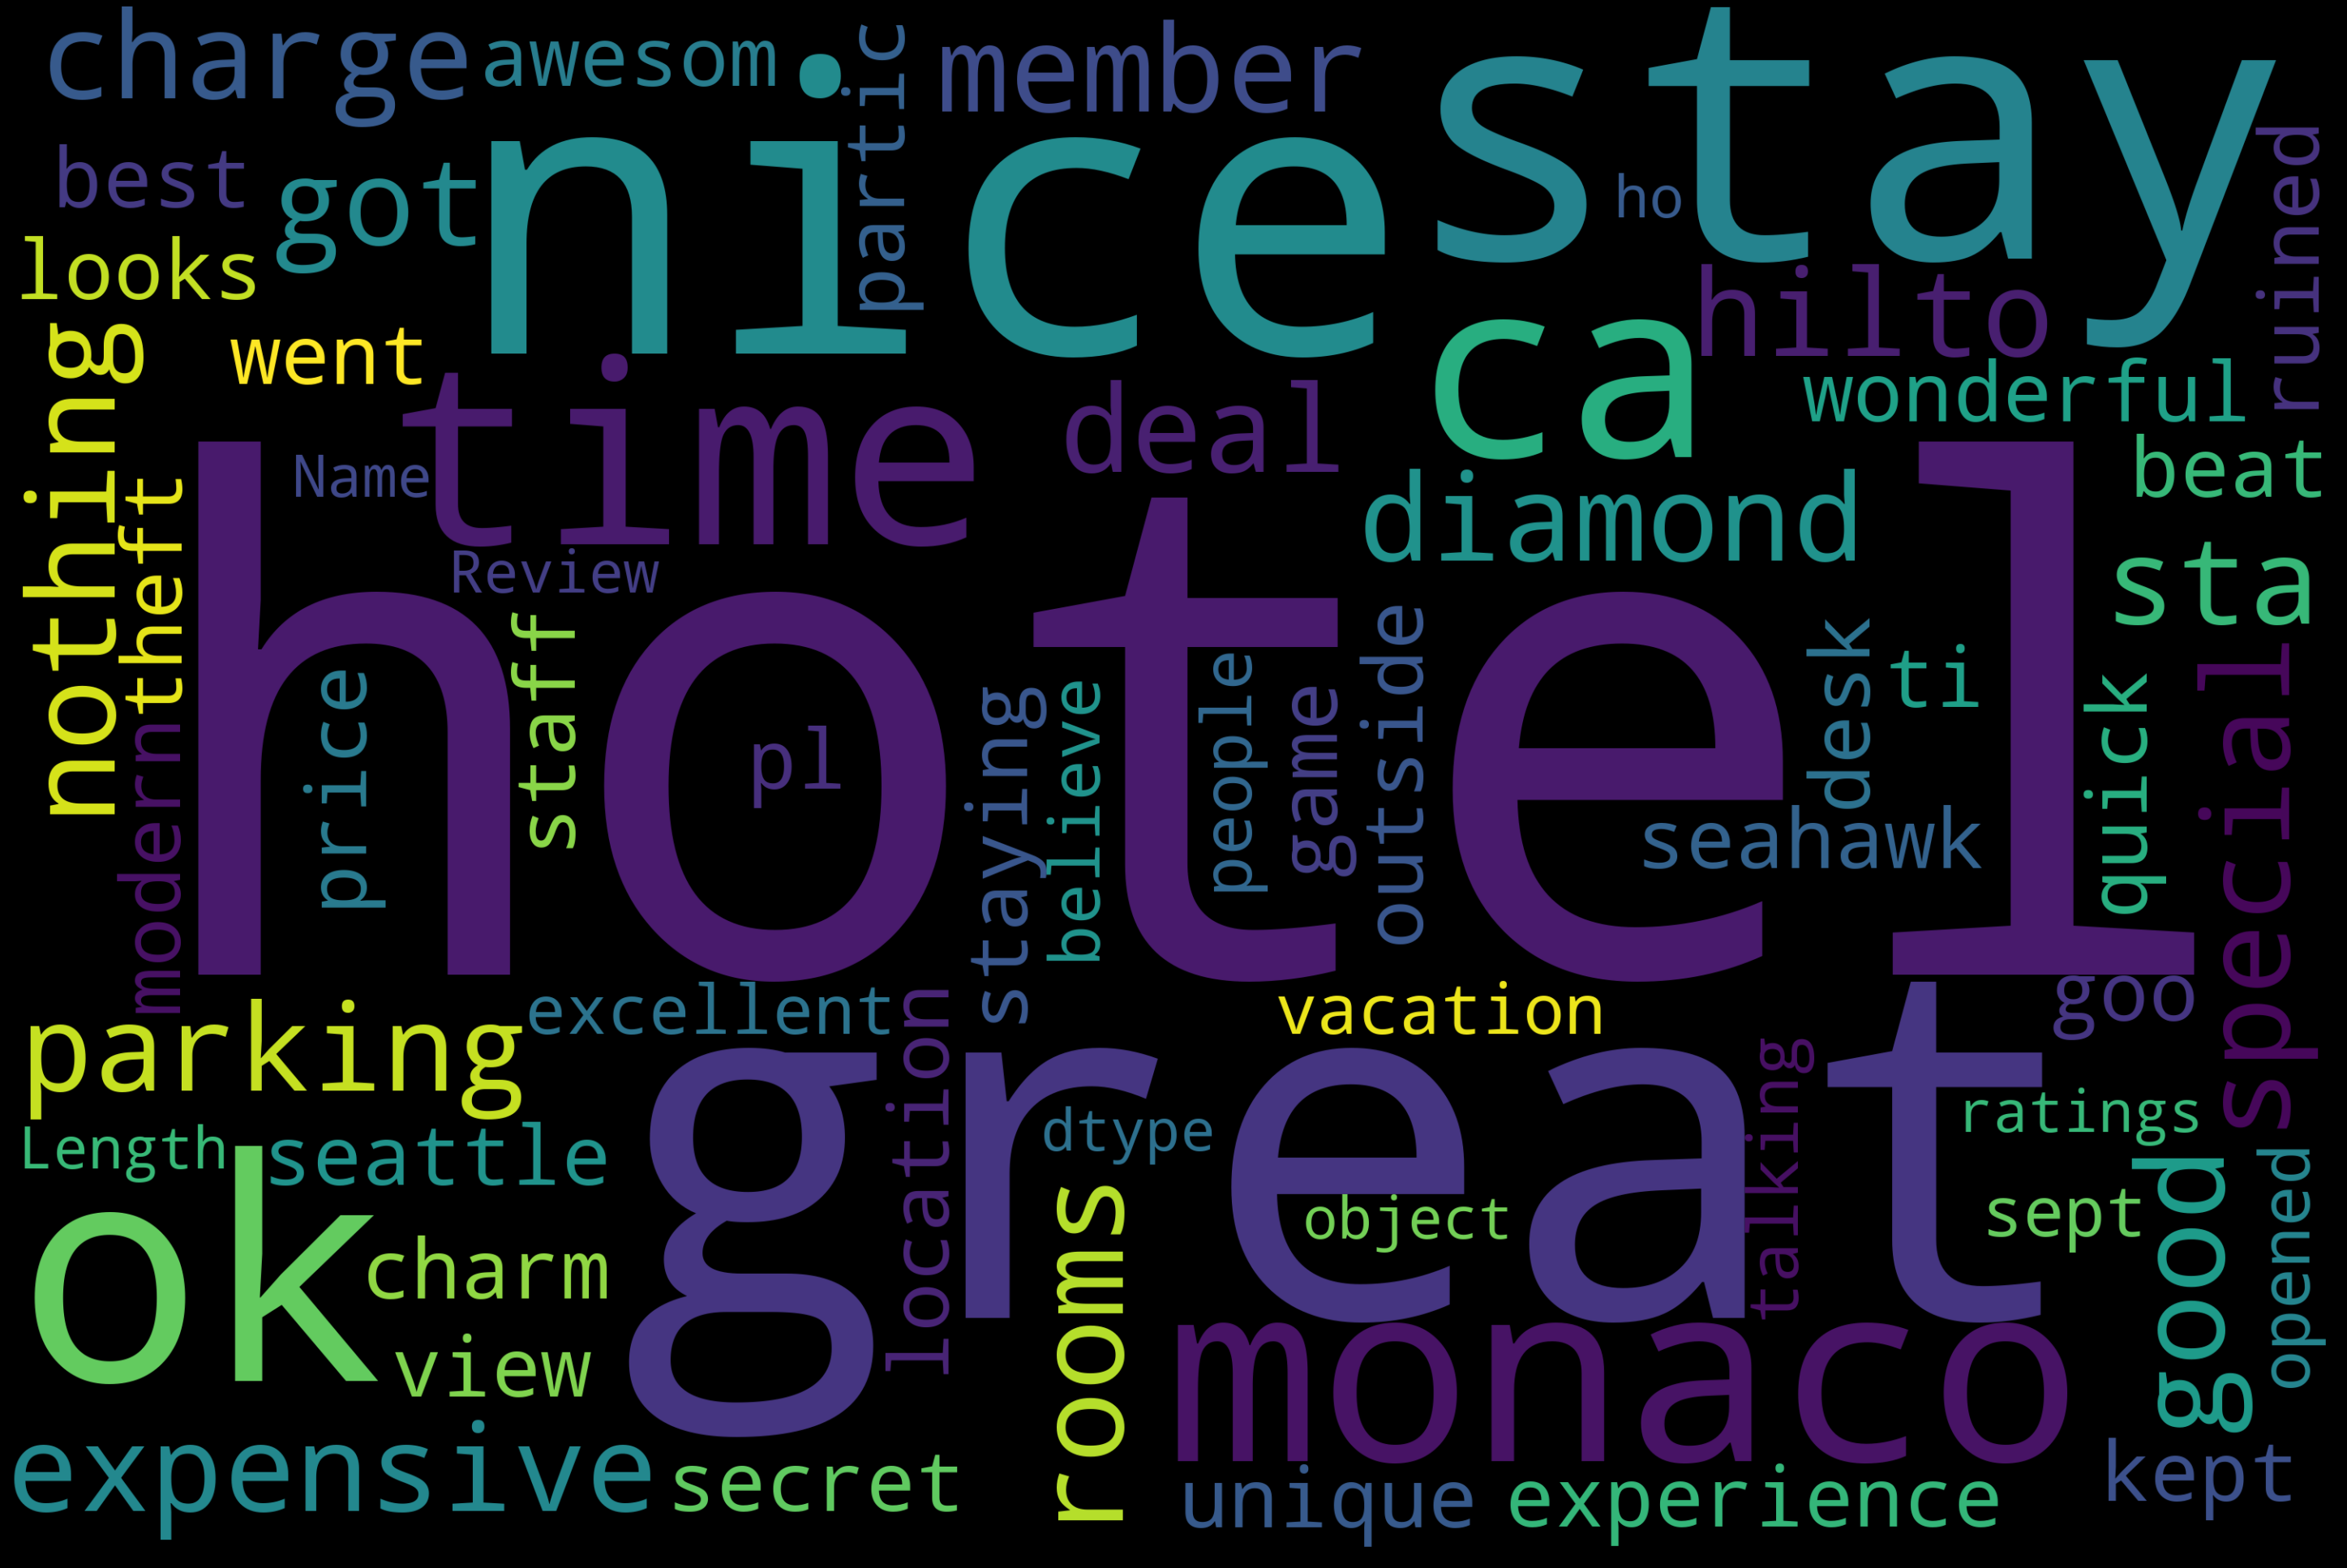

In [6]:
hotel_data['Review'] = hotel_data['Review'].values
generate_word_cloud(hotel_data['Review'])

In [7]:
hotel_data['Review'] = hotel_data['Review'].apply((lambda y:re.sub("http://\S+"," ", y)))
hotel_data['Review'] = hotel_data['Review'].apply((lambda x:re.sub("\@", " ",x.lower())))

In [8]:
def basic_clean(text):
    """A simple function to clean up the data. All the words that
    are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed."""
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [9]:
review = basic_clean(''.join(str(hotel_data['Review'].tolist())))

## N-Gram
In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles

### N-gram Analysis - Bigram

In [10]:
bigrams_series = (pd.Series(nltk.ngrams(review, 2)).value_counts())[:20]

Text(0.5, 0, 'Number of Occurances')

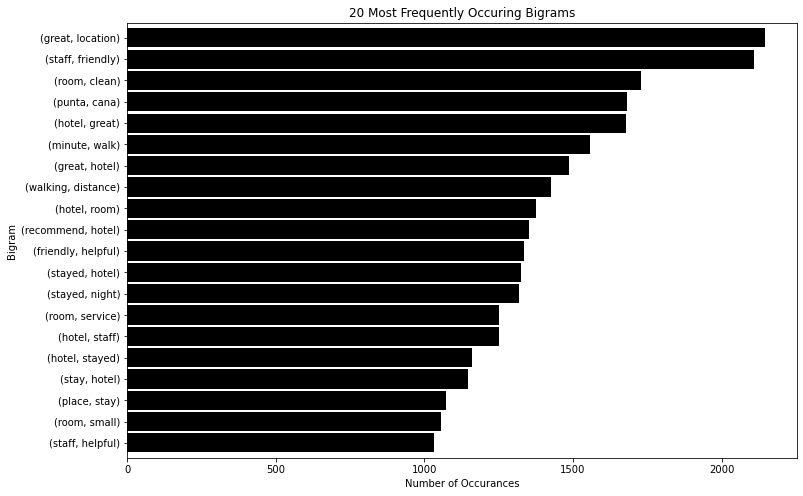

In [11]:
bigrams_series.sort_values().plot.barh(color='black', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')